## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path = "C:\\Users\\kedar\\Desktop\\Projects\\CIVE 7100 Stock Market Time Series Project\\datasets\\"

## Importing the Datasets

In [2]:
# Importing the constituents dataset
stock_info = pd.read_csv(path+'constituents.csv')

# Importing the S&P 500 combined stock dataset
stock_data = pd.read_csv(path+'S_and_P500_data.csv')

# Importing the S&P 500 company closing price dataset
df = pd.read_csv(path+'s_and_p_500_closing.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Importing the S&P 500 index dataset
index_df = pd.read_csv(path+'s_and_p_500_index_data.csv')

# Importing the S&P 500 individual sector dataset
sector_df = pd.read_csv(path+'sector_index_data.csv')

In [3]:
df.index = pd.DatetimeIndex(df.Date)
df.drop(['Date'], axis=1, inplace=True)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-21,36.522472,33.627579,116.624779,16.971952,35.400806,56.989952,24.950001,33.234032,69.367897,64.300003,...,175.679291,24.873243,70.302071,43.086273,32.019142,47.160797,83.767342,64.339996,26.578955,27.425486
2014-04-22,36.709454,34.089531,116.826508,16.988882,35.816185,56.884411,25.459999,33.139584,69.306953,64.480003,...,185.690308,24.889137,69.912018,42.905510,32.190403,48.072880,83.557739,66.980003,26.042629,28.237947
2014-04-23,36.736168,34.966282,117.345291,16.766815,35.909302,57.025124,25.299999,33.139584,68.845749,64.389999,...,177.724472,24.889137,70.002571,42.848431,32.163368,47.657173,83.348091,68.000000,26.200886,27.832634
2014-04-24,36.916470,35.126549,117.527786,18.141397,35.322025,57.069096,25.080000,32.993649,68.193039,63.220001,...,183.146744,25.032181,69.661255,42.544014,32.271538,47.644764,92.936096,69.300003,25.638186,28.375650
2014-04-25,36.322117,33.938690,115.885048,18.274639,35.193119,55.257393,24.690001,32.650223,68.253952,61.610001,...,173.144241,25.389784,69.939888,42.182499,31.919973,48.190754,91.632774,67.699997,25.497511,28.631975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,128.289993,18.950001,220.580002,170.399994,158.949997,162.960007,304.429993,119.480003,325.589996,431.670013,...,73.570000,74.370003,86.809998,48.750000,86.540001,121.870003,127.949997,405.000000,64.019997,189.520004
2022-04-14,126.440002,19.000000,218.679993,165.289993,162.309998,161.210007,306.079987,117.690002,319.470001,420.440002,...,73.970001,74.339996,87.830002,49.070000,84.139999,122.970001,126.000000,393.679993,62.919998,187.300003
2022-04-18,123.839996,18.540001,218.250000,165.070007,159.360001,161.899994,301.510010,116.290001,313.600006,425.470001,...,73.459999,74.199997,88.550003,48.720001,82.650002,123.169998,125.230003,394.279999,63.680000,182.809998


## Exploring the dataset

In [4]:
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      504 non-null    object
 1   Name        504 non-null    object
 2   Sector      504 non-null    object
 3   Sub-Sector  504 non-null    object
dtypes: object(4)
memory usage: 15.9+ KB


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996628 entries, 0 to 996627
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       996628 non-null  object 
 1   High       996628 non-null  float64
 2   Low        996628 non-null  float64
 3   Open       996628 non-null  float64
 4   Close      996628 non-null  float64
 5   Volume     996628 non-null  float64
 6   Adj Close  996628 non-null  float64
 7   Name       996628 non-null  object 
dtypes: float64(6), object(2)
memory usage: 60.8+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2016 entries, 2014-04-21 to 2022-04-20
Columns: 504 entries, A to ZTS
dtypes: float64(504)
memory usage: 7.8 MB


In [7]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2016 non-null   object 
 1   Open       2016 non-null   float64
 2   High       2016 non-null   float64
 3   Low        2016 non-null   float64
 4   Close      2016 non-null   float64
 5   Adj Close  2016 non-null   float64
 6   Volume     2016 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.4+ KB


In [8]:
sector_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008 entries, 0 to 20007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20008 non-null  object 
 1   Open       20008 non-null  float64
 2   High       20008 non-null  float64
 3   Low        20008 non-null  float64
 4   Close      20008 non-null  float64
 5   Adj Close  20008 non-null  float64
 6   Volume     20008 non-null  float64
 7   Sector     20008 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


Check for unique values in the stock constituents dataset

In [9]:
stock_info.Sector.nunique()

11

In [10]:
stock_info.Sector.unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [11]:
stock_info.groupby('Sector')['Name'].nunique()

Sector
Communication Services    26
Consumer Discretionary    60
Consumer Staples          32
Energy                    21
Financials                66
Health Care               65
Industrials               73
Information Technology    74
Materials                 28
Real Estate               30
Utilities                 29
Name: Name, dtype: int64

Check for null values in the dataset

In [12]:
df.isnull().sum().sum()

19436

Check which columns have null values

In [13]:
df.columns[df.isnull().any()]

Index(['ANET', 'CARR', 'CDAY', 'CEG', 'CFG', 'CTLT', 'CTVA', 'CZR', 'DOW',
       'ETSY', 'FOX', 'FOXA', 'FTV', 'HPE', 'HWM', 'IR', 'KEYS', 'KHC', 'LW',
       'MRNA', 'OGN', 'OTIS', 'PYPL', 'QRVO', 'SEDG', 'SYF', 'UA', 'WRK'],
      dtype='object')

Fill in the null values

In [14]:
df=df.fillna(method ='bfill')
df['ANET']

Date
2014-04-21     13.750000
2014-04-22     13.750000
2014-04-23     13.750000
2014-04-24     13.750000
2014-04-25     13.750000
                 ...    
2022-04-13    131.369995
2022-04-14    126.580002
2022-04-18    126.199997
2022-04-19    128.839996
2022-04-20    127.160004
Name: ANET, Length: 2016, dtype: float64

Visualize 4 different stocks

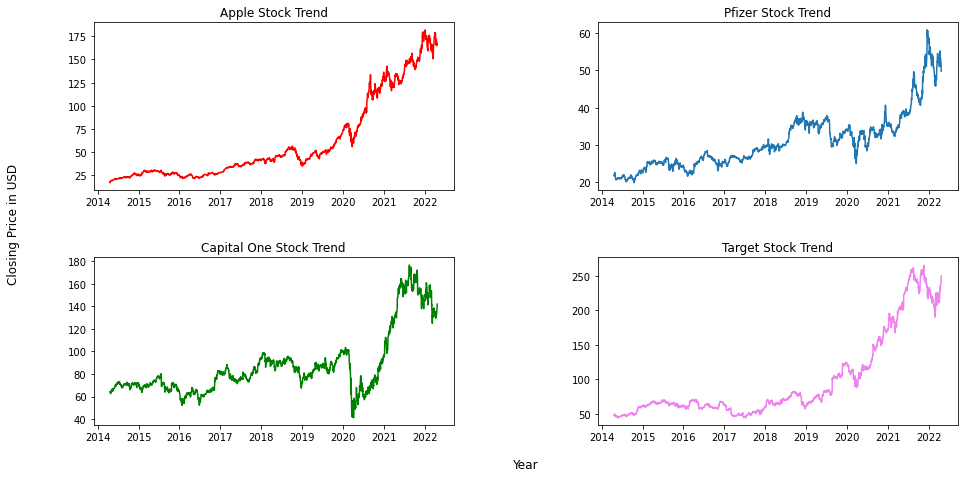

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.lineplot(ax=axes[0, 0], x='Date', y='AAPL', data=df, color='r')
axes[0, 0].set_title("Apple Stock Trend")
axes[0, 0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[0, 1], x='Date', y='PFE', data=df)
axes[0, 1].set_title("Pfizer Stock Trend")
axes[0, 1].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1, 0], x='Date', y='COF', data=df, color='g')
axes[1, 0].set_title("Capital One Stock Trend")
axes[1, 0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1, 1], x='Date', y='TGT', data=df, color='violet')
axes[1, 1].set_title("Target Stock Trend")
axes[1, 1].set(xlabel=None, ylabel=None)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.supxlabel('Year')
fig.supylabel('Closing Price in USD')
plt.show()

Selection of the last value of each week.

In [16]:
df_week = df.resample('W').last()
df_week.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-27,36.322117,33.938690,115.885048,18.274639,35.193119,55.257393,24.690001,32.650223,68.253952,61.610001,...,173.144241,25.389784,69.939888,42.182499,31.919973,48.190754,91.632774,67.699997,25.497511,28.631975
2014-05-04,36.422302,34.400635,116.903343,18.934124,36.654118,56.523823,22.709999,33.105255,69.063301,61.560001,...,190.493927,24.785831,71.054352,43.010155,33.227058,47.278683,89.418068,71.919998,25.356833,29.087650
2014-05-11,36.989933,36.069286,119.660461,18.813681,37.427601,57.675938,21.590000,33.474434,68.523735,59.590000,...,172.284927,24.436174,71.494682,43.904427,33.524551,47.359348,91.122406,74.029999,25.532677,28.992720
2014-05-18,36.749516,36.323830,116.884132,19.198277,37.907425,60.287415,21.500000,33.534527,69.211243,61.639999,...,174.455505,24.237509,70.646141,44.132744,33.263134,46.416252,91.696579,72.300003,24.635872,29.049679
2014-05-25,37.517506,36.870625,118.392357,19.732288,38.637947,63.226345,21.100000,33.998131,69.437515,64.300003,...,179.721100,24.030897,71.052872,44.617935,34.753876,46.391438,92.817604,73.330002,25.031734,28.983232


Calculating returns

In [17]:
start = df_week.iloc[0] #Selection of the initial value for each stock selected.
returns = (df_week - start) / start #Calculation of % variation between each date and the initial value.
returns = returns.dropna()
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-04,0.002758,0.013611,0.008787,0.036087,0.041514,0.022919,-0.080194,0.013937,0.011858,-0.000812,...,0.100204,-0.023787,0.015935,0.019621,0.040949,-0.018926,-0.024169,0.062334,-0.005517,0.015915
2014-05-11,0.018386,0.062778,0.032579,0.029497,0.063492,0.043769,-0.125557,0.025244,0.003953,-0.032787,...,-0.004963,-0.037559,0.022230,0.040821,0.050269,-0.017252,-0.005570,0.093501,0.001379,0.012599
2014-05-18,0.011767,0.070278,0.008621,0.050542,0.077126,0.091029,-0.129202,0.027084,0.014025,0.000487,...,0.007573,-0.045383,0.010098,0.046234,0.042079,-0.036822,0.000696,0.067947,-0.033793,0.014589
2014-05-25,0.032911,0.086389,0.021636,0.079764,0.097884,0.144215,-0.145403,0.041283,0.017341,0.043662,...,0.037985,-0.053521,0.015913,0.057736,0.088781,-0.037337,0.012930,0.083161,-0.018268,0.012268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,2.736291,-0.498802,0.860292,8.560791,3.545502,1.799444,11.915350,2.628697,3.787079,6.005681,...,-0.536398,1.784584,0.218189,0.177977,1.715854,1.482219,0.367196,5.287445,1.787723,5.616030
2022-04-03,2.688386,-0.462560,0.790395,8.538355,3.583539,1.832562,12.715675,2.617410,3.975957,6.436942,...,-0.534319,1.865326,0.188449,0.167546,1.701443,1.465618,0.393934,5.111226,1.521815,5.674705
2022-04-10,2.713165,-0.511177,0.947965,8.307434,3.929530,1.993989,11.739165,2.759874,3.950832,6.228372,...,-0.582833,1.946855,0.241638,0.139098,1.715228,1.472881,0.414559,5.139291,1.505735,5.988341


In [18]:
#Elimination of the first row, since the variation between the initial value ant itself is always 0
returns = returns.iloc[1:,:] 

In [19]:
def plot_stock(name, returns=returns): #Definition of a function function to plot the monthly variation of the stocks.
    returns[name].plot(label=name, alpha=0.9);

Text(0.5, 1.0, 'Random 5 Stock Variaton')

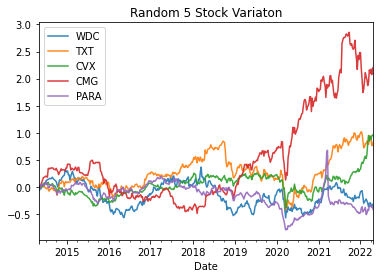

In [20]:
returns_sample = returns[returns.columns.to_series().sample(5)] #Random selection of 5 stocks
returns_sample_name = returns_sample.columns #Array with the name of the Stocks that were random selected

n=0
while n < 5: 
    plot_stock(returns_sample_name[n])
    n=n+1

plt.legend()
plt.title('Random 5 Stock Variaton')

In [21]:
from sklearn.cluster import KMeans # KMeans clustering library

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(returns.T) #Don't forget to "Transpose" the DataFrame!!
    Sum_of_squared_distances.append(km.inertia_)

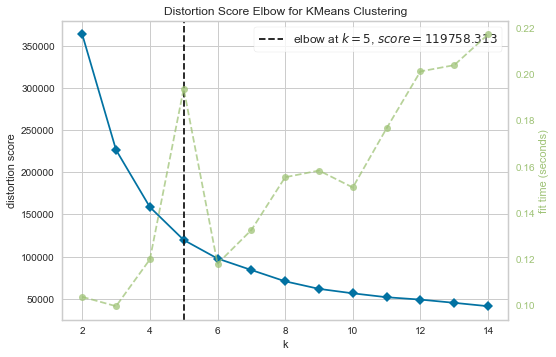

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,15))

distortion_visualizer.fit(returns.T)       
distortion_visualizer.show()  

In [23]:
kmeans = KMeans(n_clusters=distortion_visualizer.elbow_value_, random_state=50).fit(returns.T);
labels=kmeans.labels_

In [24]:
clusters = {}
for l in np.unique(kmeans.labels_):
    clusters[l] = []

for i,l in enumerate(kmeans.predict(returns.T)):
    clusters[l].append(returns.columns[i])
for c in sorted(clusters):
    print('Cluster ' + str(c+1) + ': ', end='')
    for symbol in clusters[c]:
        print(symbol, end=' , ')
    print()
    print()

Cluster 1: AAL , AAP , ABC , ADM , AEE , AEP , AES , AFL , AIG , AIZ , AKAM , ALB , ALK , ALL , ALLE , AMCR , AME , AMGN , AMP , APA , APTV , ATO , AVB , AXP , AZO , BA , BAC , BAX , BBWI , BDX , BEN , BF-B , BIIB , BK , BKNG , BKR , BMY , BRK-B , BWA , BXP , C , CAG , CAH , CAT , CB , CBOE , CCL , CDAY , CE , CEG , CERN , CF , CFG , CHRW , CL , CLX , CMA , CMCSA , CMG , CMI , CMS , CNP , COF , COP , CPB , CPT , CTRA , CTSH , CTVA , CTXS , CVS , CVX , D , DAL , DD , DFS , DIS , DISH , DLTR , DOV , DOW , DTE , DUK , DVA , DVN , DXC , EBAY , ECL , ED , EIX , EMN , EMR , EOG , EQR , ES , ESS , ETR , EVRG , EXC , EXPE , F , FANG , FAST , FBHS , FCX , FDX , FE , FFIV , FITB , FLT , FMC , FOX , FOXA , FRT , FTV , GD , GE , GILD , GIS , GL , GLW , GM , GPC , GS , GWW , HAL , HAS , HBAN , HES , HIG , HII , HON , HPE , HPQ , HRL , HSIC , HST , HSY , HWM , IBM , IFF , INCY , INTC , IP , IPG , IR , IRM , IVZ , J , JBHT , JCI , JNJ , JNPR , K , KEY , KHC , KIM , KMB , KMI , KMX , KO , KR , L , LEN

In [25]:
len(clusters[0]), len(clusters[1]), len(clusters[2]), len(clusters[3]), len(clusters[4])

(305, 6, 40, 1, 152)

In [26]:
stock_info.groupby('Sector')['Name'].nunique()

Sector
Communication Services    26
Consumer Discretionary    60
Consumer Staples          32
Energy                    21
Financials                66
Health Care               65
Industrials               73
Information Technology    74
Materials                 28
Real Estate               30
Utilities                 29
Name: Name, dtype: int64

In [27]:
#stock_info.head()
cluster1_df = stock_info[stock_info['Symbol'].isin(clusters[0])]
c1_count = cluster1_df.groupby('Sector')['Name'].nunique()

In [28]:
cluster2_df = stock_info[stock_info['Symbol'].isin(clusters[1])]
c2_count = cluster2_df.groupby('Sector')['Name'].nunique()

In [29]:
cluster3_df = stock_info[stock_info['Symbol'].isin(clusters[2])]
c3_count = cluster3_df.groupby('Sector')['Name'].nunique()

In [30]:
cluster4_df = stock_info[stock_info['Symbol'].isin(clusters[3])]
c4_count = cluster4_df.groupby('Sector')['Name'].nunique()

In [34]:
cluster5_df = stock_info[stock_info['Symbol'].isin(clusters[4])]
c5_count = cluster5_df.groupby('Sector')['Name'].nunique()

True

In [41]:
palette_color = sns.color_palette('pastel')
def show_pie_chart(service, title):
    labels = []
    sizes = []

    for x, y in service.items():
        labels.append(x)
        sizes.append(y)

    # Plot
    plt.pie(sizes, labels=labels, colors=palette_color, autopct='%.0f%%')
    plt.title(title)
    plt.axis('equal')
    plt.show()

def get_count(cdf, key):
    return cdf[key] if key in cdf else 0

def get_plots(key):
    comm_services = {'Cluster 1': get_count(c1_count, key), 'Cluster 2': get_count(c2_count, key), 
                 'Cluster 3': get_count(c3_count, key), 'Cluster 4': get_count(c4_count, key), 
                 'Cluster 5': get_count(c5_count, key)}
    comm_services = {x:y for x,y in comm_services.items() if y!=0}
    show_pie_chart(comm_services, key)

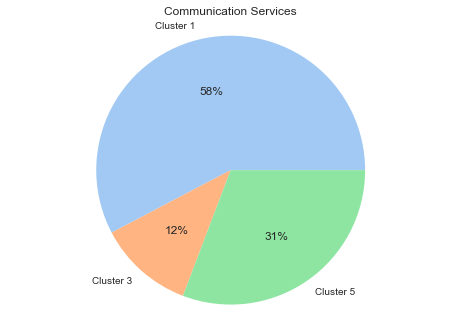

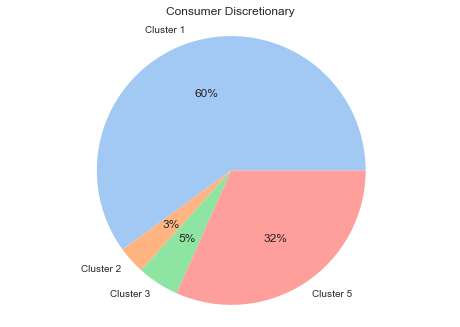

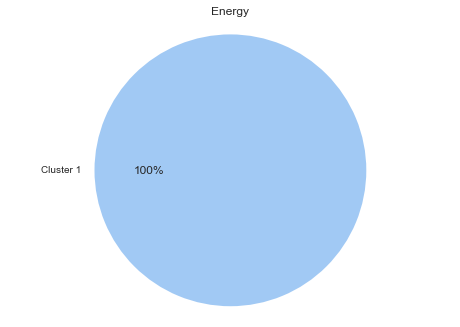

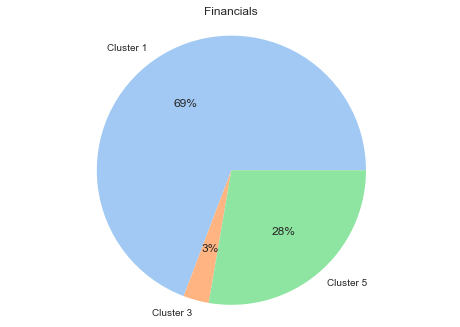

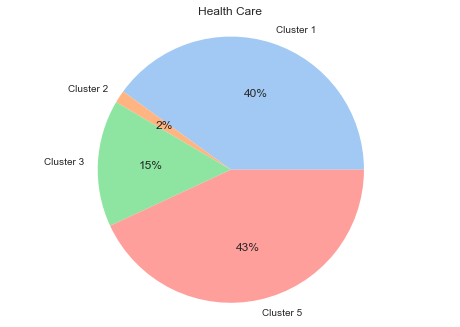

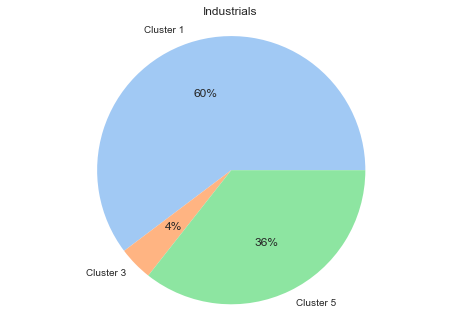

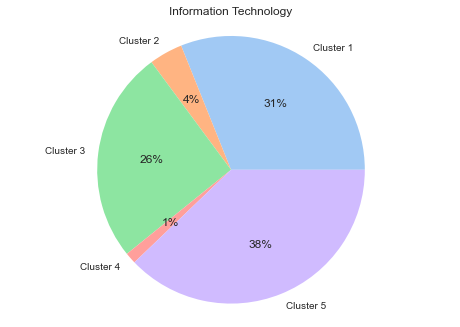

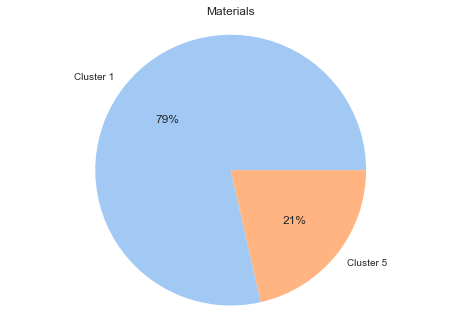

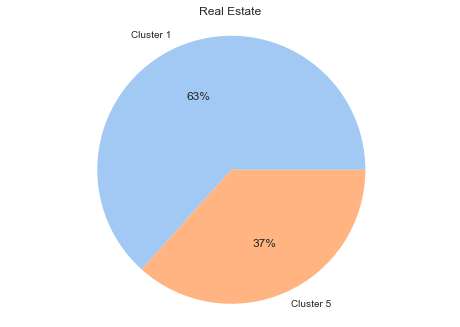

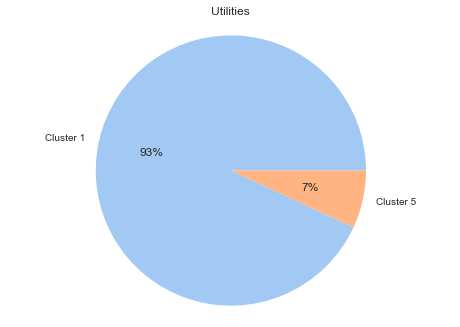

In [44]:
key = 'Communication Services'
get_plots(key)
key = 'Consumer Discretionary'
get_plots(key)
key = 'Energy'
get_plots(key)
key = 'Financials'
get_plots(key)
key = 'Health Care'
get_plots(key)
key = 'Industrials'
get_plots(key)
key = 'Information Technology'
get_plots(key)
key = 'Materials'
get_plots(key)
key = 'Real Estate'
get_plots(key)
key = 'Utilities'
get_plots(key)

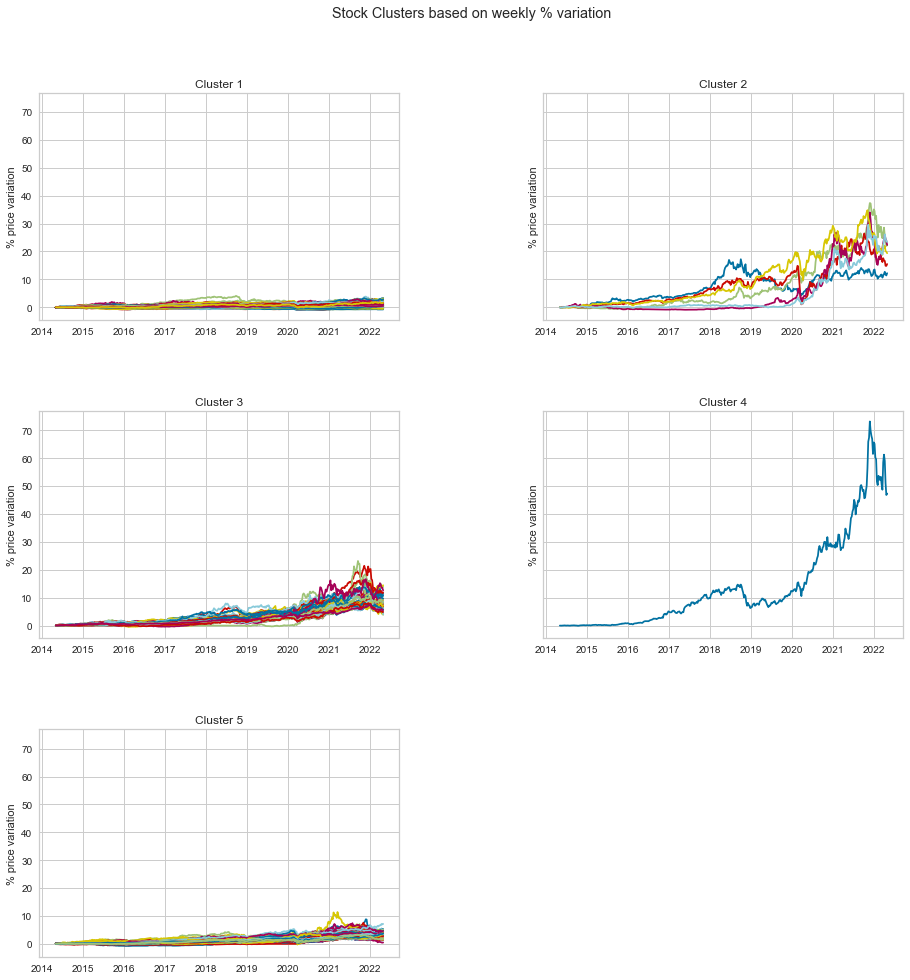

In [45]:
fig, axs = plt.subplots(3, 2,  sharey=True, figsize=(15, 15))
fig.suptitle('Stock Clusters based on weekly % variation')
#plt.ylabel('Stock Price Variation')
axs[0, 0].plot(returns[clusters[0]])
axs[0, 0].set_title('Cluster 1')
axs[0, 1].plot(returns[clusters[1]])
axs[0, 1].set_title('Cluster 2')
axs[1, 0].plot(returns[clusters[2]])
axs[1, 0].set_title('Cluster 3')
axs[1, 1].plot(returns[clusters[3]])
axs[1, 1].set_title('Cluster 4')
axs[2, 0].plot(returns[clusters[4]])
axs[2, 0].set_title('Cluster 5')

for ax in axs.flat:
    ax.set(ylabel='% price variation')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.delaxes(axs[2,1]) 
plt.savefig('Stock Clusters.png')
plt.show()

In [46]:
print(f'Silhouette Score = {silhouette_score(returns.T, labels)}')

Silhouette Score = 0.4568583526622995
